In [1]:
# fmt:off
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import the function from the data_processing module
from data_processing import load_train_and_test_data
# fmt:on

# Load data
train_data, test_data = load_train_and_test_data()

# IDA: inspect data
print("Train data sample:")
print(train_data.head())
print()
print("Test data sample:")
print(test_data.head())

Train data sample:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Test data sample:
             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1  

In [2]:
# IDA: check for missing values
print("Train data missing values by feature:")
print(train_data.isnull().sum())
print()
print("Test data missing values by feature:")
print(test_data.isnull().sum())

Train data missing values by feature:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Test data missing values by feature:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [3]:
# IDA: check for duplicate rows
print("Train data duplicate row count:")
print(train_data.duplicated().sum())
print()
print("Test data duplicate row count:")
print(test_data.duplicated().sum())

Train data duplicate row count:
0

Test data duplicate row count:
0


In [4]:
# IDA: check data types
print("Data types by feature:")
print(train_data.dtypes)

Data types by feature:
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [5]:
# IDA: calculate number of unique values for integer type numerical features
unique_counts = train_data.select_dtypes(
    include=['int64']).nunique()

print("Unique value counts of integer type features:")
print(unique_counts)

Unique value counts of integer type features:
season          4
holiday         2
workingday      2
weather         4
humidity       89
casual        309
registered    731
count         822
dtype: int64


In [6]:
from data_processing import perform_categorical_conversion

# Preprocess: convert necessary features to categorical
train_data = perform_categorical_conversion(train_data)

In [7]:
# Create variables to hold different data subsets
feature_data = train_data.drop(columns=['casual', 'registered','count'])
class_data = train_data[['casual', 'registered', 'count']]
numerical = feature_data.select_dtypes(
    include=['datetime64[ns]', 'float64', 'int64']).columns
categorical = feature_data.select_dtypes(include=['object', 'category']).columns

# IDA: view numerical summary statistics
print("Numerical feature summary statistics:")
print(feature_data[numerical].describe())

Numerical feature summary statistics:
                            datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed  
count  10886.000000  
mean      12.799395  
min        0.000000  
25%        7.001500  
50%       12.998000  
75%       16.997900  
max       56.996900  
std        8.164537  


In [8]:
# IDA: view categorical summary statistics
print("Categorical feature summary statistics:")
print(feature_data[categorical].describe)

Categorical feature summary statistics:
<bound method NDFrame.describe of       season holiday workingday weather
0          1       0          0       1
1          1       0          0       1
2          1       0          0       1
3          1       0          0       1
4          1       0          0       1
...      ...     ...        ...     ...
10881      4       0          1       1
10882      4       0          1       1
10883      4       0          1       1
10884      4       0          1       1
10885      4       0          1       1

[10886 rows x 4 columns]>


In [9]:
# IDA: view class summary statistics
print("Class summary statistics:")
print(class_data.describe())

Class summary statistics:
             casual    registered         count
count  10886.000000  10886.000000  10886.000000
mean      36.021955    155.552177    191.574132
std       49.960477    151.039033    181.144454
min        0.000000      0.000000      1.000000
25%        4.000000     36.000000     42.000000
50%       17.000000    118.000000    145.000000
75%       49.000000    222.000000    284.000000
max      367.000000    886.000000    977.000000


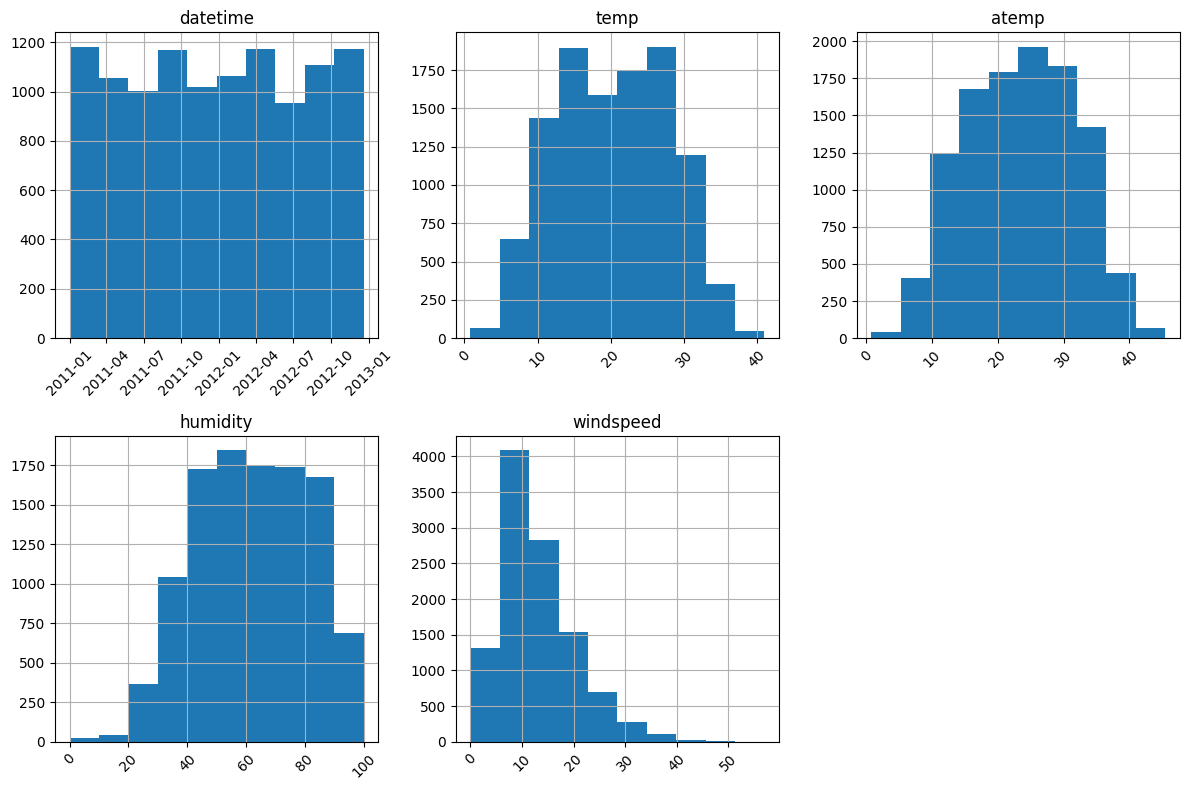

In [10]:
import matplotlib.pyplot as plt

# Univariate analysis: numerical feature distributions
axes = feature_data[numerical].hist(figsize=(12, 8), layout=(2, 3), sharex=False)

# Rotate x-axis labels for each subplot
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

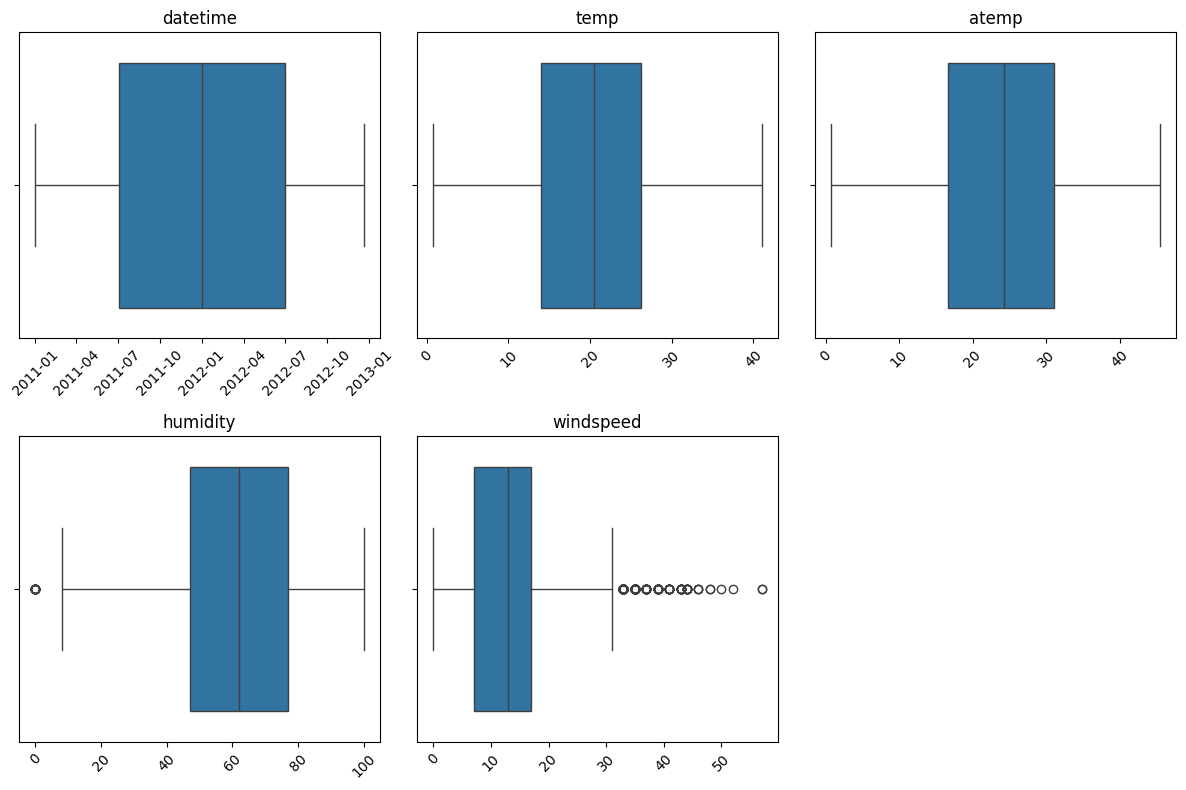

In [12]:
import seaborn as sns

# Univariate analysis: numerical outliers
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical):
    sns.boxplot(data=feature_data, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

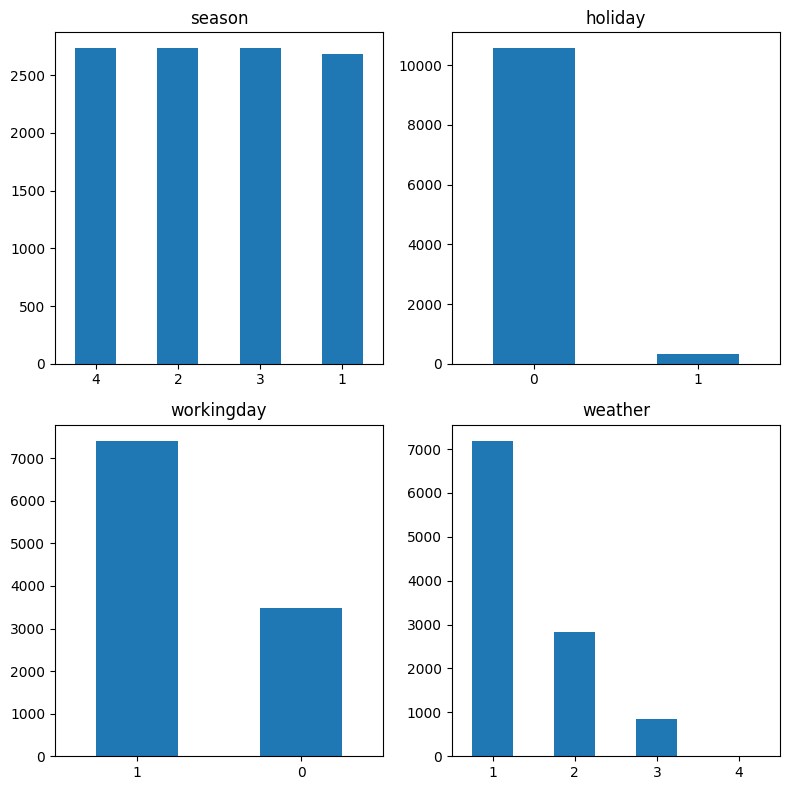

In [17]:
# Univariate analysis: categorical feature distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for i, col in enumerate(categorical):
    feature_data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()